# Template Matching
Template matching is the process of moving the template over the entire image and calculating the similarity between the template and the covered window on the image.

I have created a template of Iron Man as below and in this notebook we will search for his face :
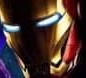



In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def show(image = None, title = "Image"):
    size = 16
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

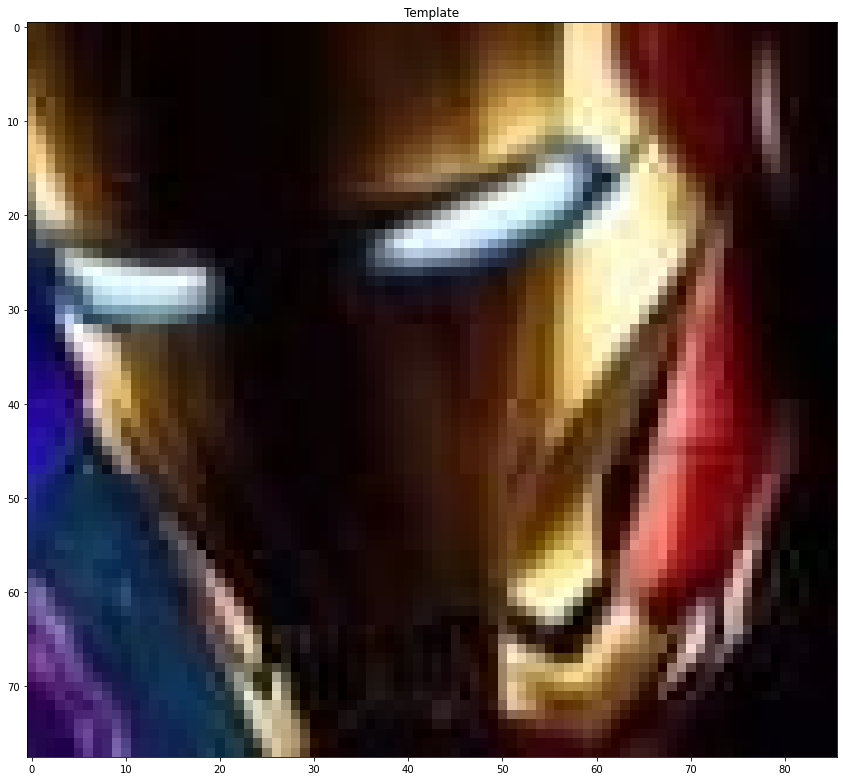

In [15]:
template = cv2.imread('images/ironman.jpg')
show(template,"Template")

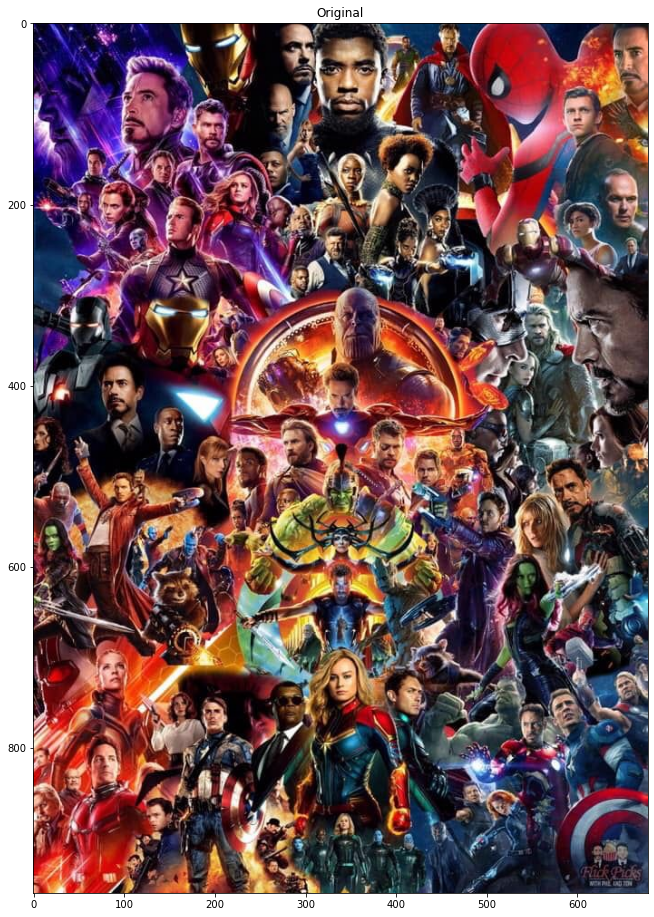

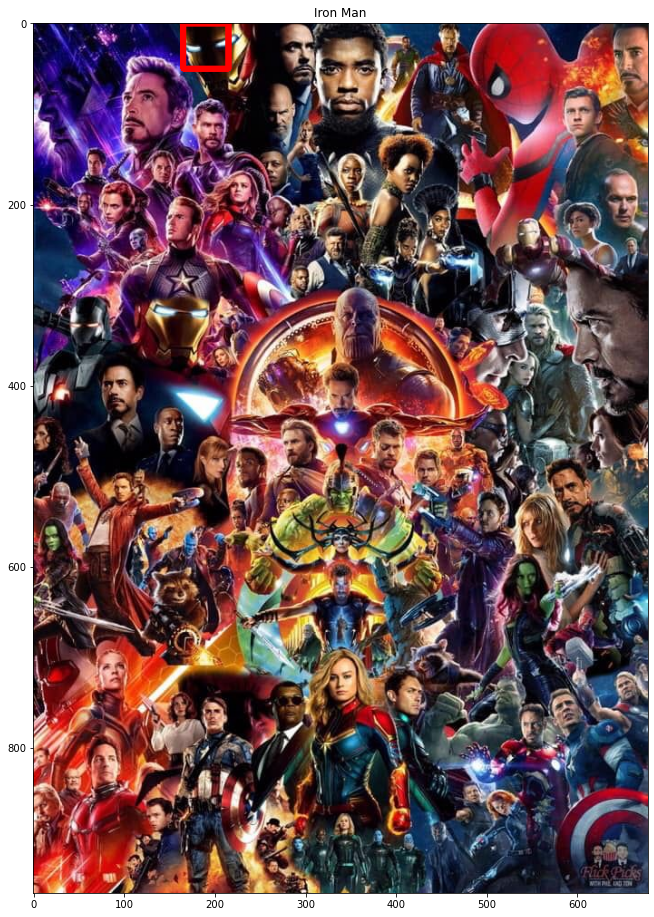

In [16]:
image = cv2.imread('images/marvel.jpg')
show(image,"Original")

gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

template_ = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)


result = cv2.matchTemplate(gray_img, template_, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)


#Create a bounding box
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

show( image,"Iron Man")

# Finding Corners in an Image
Before trying to find the corners the first thing to do is to understand what is a corner. Corner detection works on the principle that if you place a small window over an image, if that window is placed on a corner then if it is moved in any direction there will be a large change in intensity. Corners are important features (also called keypoint) which are defined as a meaningful, detectable parts of the image.
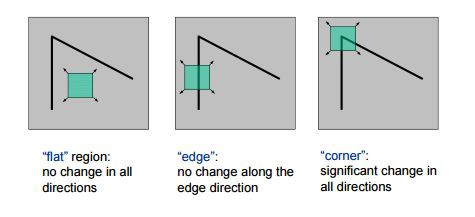


A corner detector should be:

• Accurate and with high repeatability

• Invariant against shift, rotation, scale, brightness changes

• Robust against noise


There are many different approaches for detecting the corners. Some examples are:
- Harris Corner Detector
- FAST Corner Detector

# 1. Harris Corner Detector
_source_ : https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html

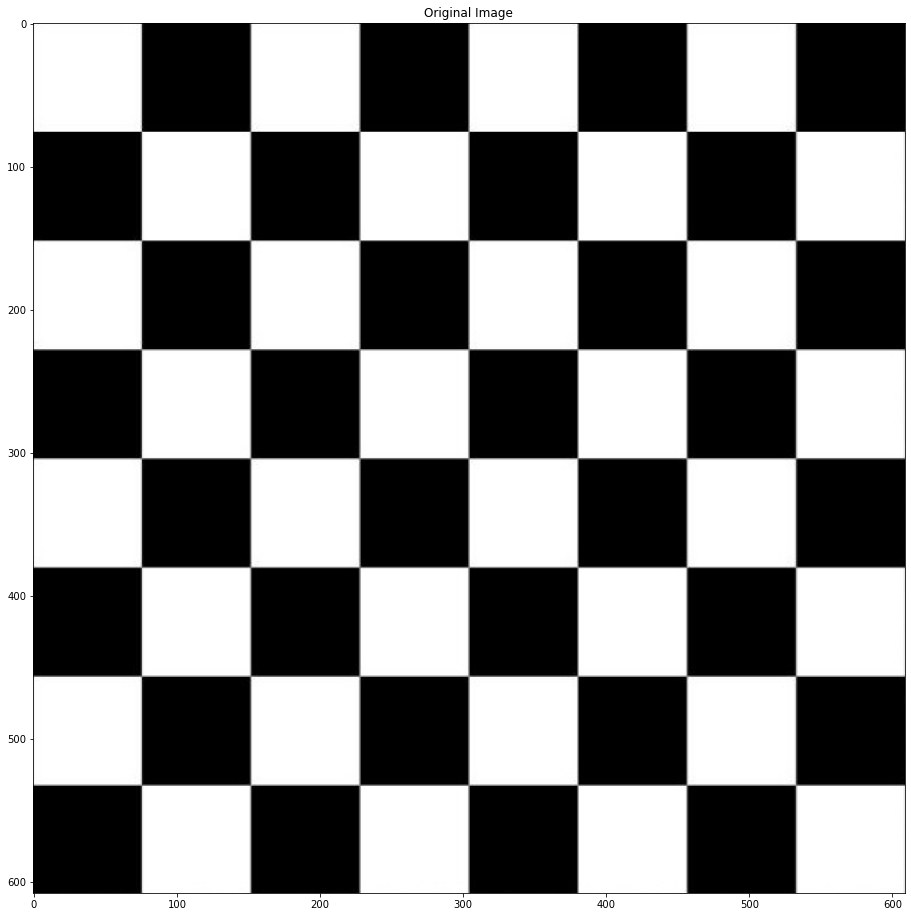

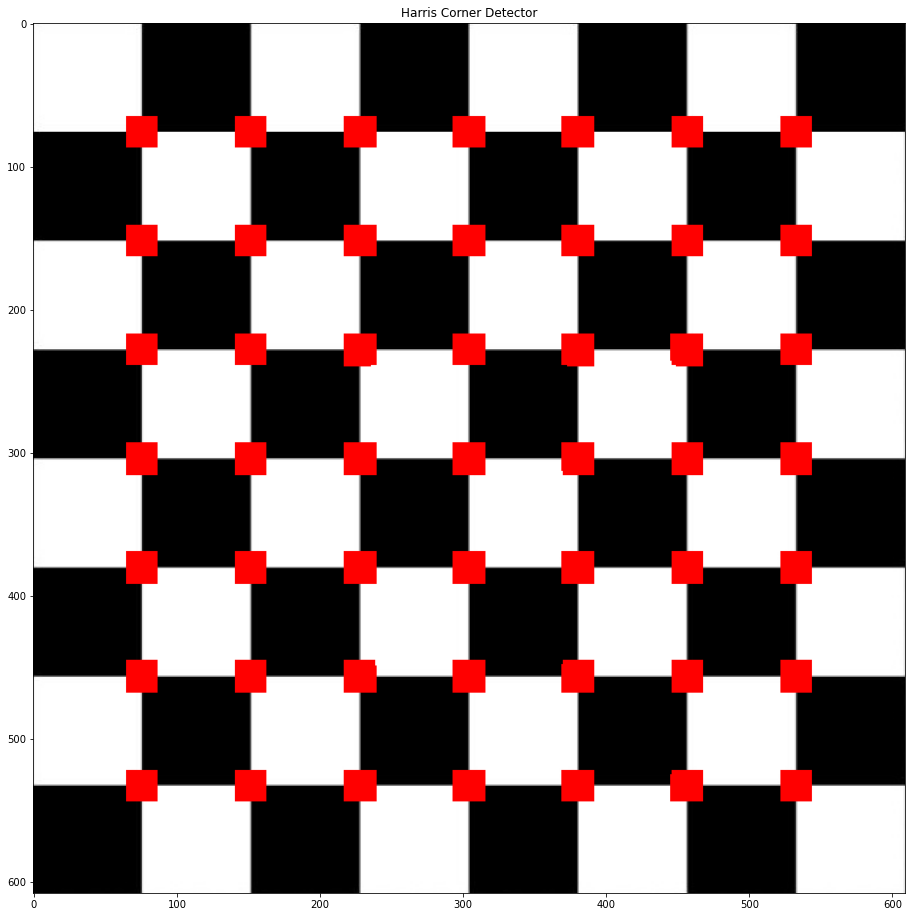

In [18]:
image = cv2.imread('images/chess.jpg')
show(image,"Original Image")

gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#since harris corner detector requires the array data type as float32:
gray_img = np.float32(gray_img)
harris_corner = cv2.cornerHarris(gray_img , 3 , 3 , 0.05)

#We can use dilation to enlarge the corner points
kernel = np.ones((7,7),np.uint8)
harris_corner = cv2.dilate(harris_corner,kernel,iterations = 3)

# Threshold for an optimal value, it may vary depending on the image.
image[harris_corner>0.025*harris_corner.max()]=[0,0,255]

show(image,"Harris Corner Detector")

# 2. Fast Corner Detector


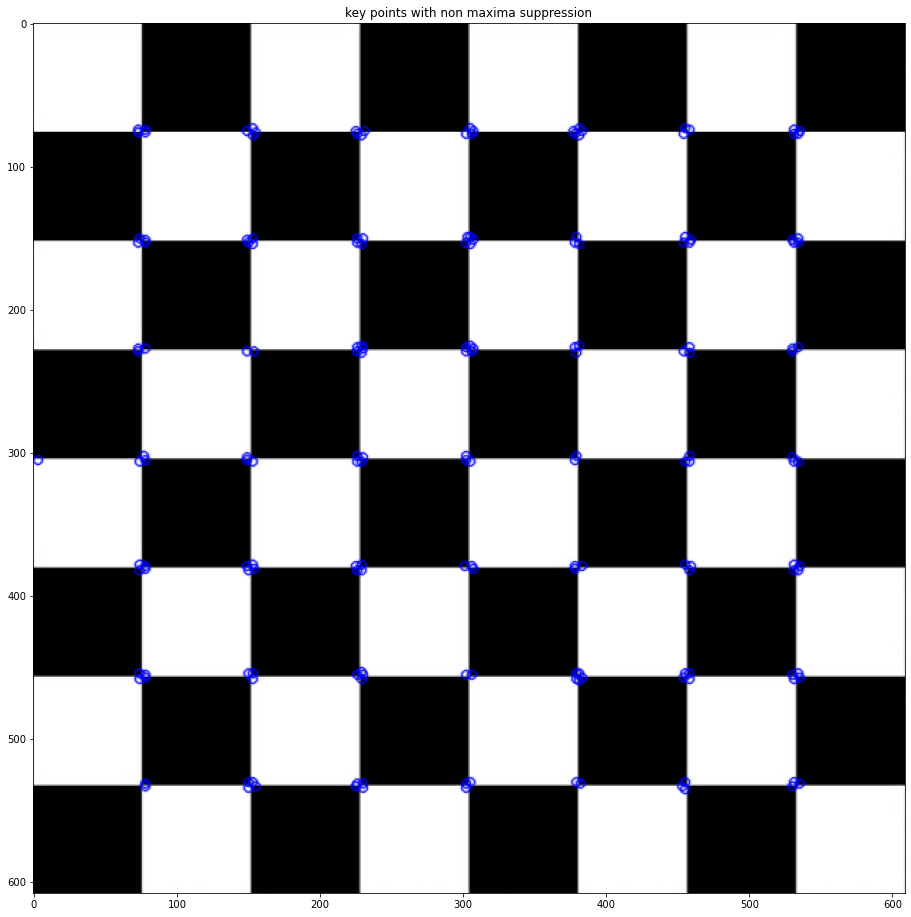

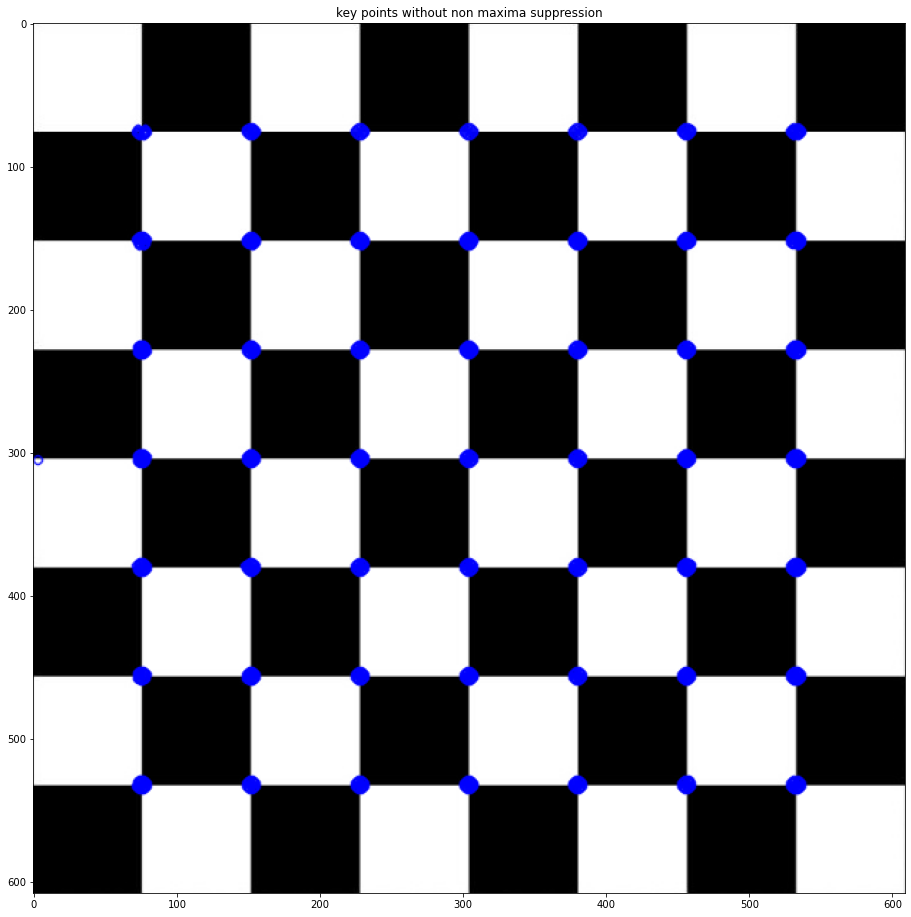

In [23]:
img = cv2.imread('images/chess.jpg',0)

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create(threshold=25)

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, None,color=(255,0,0))



show(img2, "key points with non maxima suppression")

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)



img3 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))

show(img3,"key points without non maxima suppression")


#If you would like to learn more about non maxima suppression :https://learnopencv.com/non-maximum-suppression-theory-and-implementation-in-pytorch/